In [20]:
!pip install yfinance
!pip install matplotlib
!pip install scipy
import yfinance as yf, numpy as np, datetime as dt, matplotlib as plt
import matplotlib.pyplot as plt
from scipy.stats import norm

In [21]:
tickers = ['AAPL', 'META', 'MSFT', 'MS', 'AMZN']
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [22]:
start = dt.datetime(2021,1,1)
end = dt.datetime.now()

df = yf.download(tickers, start, end)['Adj Close']
df

[*********************100%%**********************]  5 of 5 completed


Ticker,AAPL,AMZN,META,MS,MSFT
Date,,,,,
2021-01-04,126.830070,159.331497,268.388489,60.899857,211.224319
2021-01-05,128.398178,160.925507,270.414307,61.933708,211.428070
2021-01-06,124.076096,156.919006,262.770020,65.668091,205.945877
2021-01-07,128.309982,158.108002,268.188904,66.791092,211.806473
2021-01-08,129.417450,159.134995,267.021301,67.067375,213.097000
...,...,...,...,...,...
2024-07-24,218.539993,180.830002,461.269989,101.970001,428.899994
2024-07-25,217.490005,179.850006,453.410004,103.559998,418.399994
2024-07-26,217.960007,182.500000,465.700012,104.190002,425.269989


In [23]:
returns = df.pct_change()
returns

Ticker,AAPL,AMZN,META,MS,MSFT
Date,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.012364,0.010004,0.007548,0.016976,0.000965
2021-01-06,-0.033662,-0.024897,-0.028269,0.060296,-0.025929
2021-01-07,0.034123,0.007577,0.020622,0.017101,0.028457
2021-01-08,0.008631,0.006496,-0.004354,0.004137,0.006093
...,...,...,...,...,...
2024-07-24,-0.028754,-0.029934,-0.056109,-0.014783,-0.035855
2024-07-25,-0.004805,-0.005419,-0.017040,0.015593,-0.024481
2024-07-26,0.002161,0.014734,0.027106,0.006083,0.016420


In [24]:
cov_matrix = returns.cov()
cov_matrix

Ticker,AAPL,AMZN,META,MS,MSFT
Ticker,,,,,
AAPL,0.000296,0.000223,0.000252,0.000110,0.000200
AMZN,0.000223,0.000505,0.000389,0.000133,0.000253
META,0.000252,0.000389,0.000852,0.000153,0.000285
MS,0.000110,0.000133,0.000153,0.000295,0.000106
MSFT,0.000200,0.000253,0.000285,0.000106,0.000283


In [25]:
avg_returns = returns.mean()
avg_returns

Ticker
AAPL    0.000755
AMZN    0.000399
META    0.001041
MS      0.000741
MSFT    0.000915
dtype: float64

In [26]:
count = returns.count()[0]
count

/tmp/ipykernel_310/3364445099.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = returns.count()[0]


np.int64(897)

In [27]:
portfolio_mean = avg_returns @ weights
portfolio_std = np.sqrt(weights.T @ cov_matrix @ weights)

In [28]:
portfolio_mean

np.float64(0.0007703179512857453)

In [29]:
portfolio_std

np.float64(0.01604791986277225)

In [30]:
x = np.arange(-0.05, 0.05, 0.001)
normal_dist = norm.pdf(x, portfolio_mean, portfolio_std)
normal_dist

array([ 0.16676569,  0.2027122 ,  0.24545208,  0.29605145,  0.35569792,
        0.42570536,  0.50751696,  0.60270619,  0.71297517,  0.84014995,
        0.98617245,  1.15308832,  1.34303069,  1.55819912,  1.80083376,
        2.07318448,  2.37747482,  2.71586111,  3.09038681,  3.50293259,
        3.95516286,  4.44846948,  4.98391371,  5.56216754,  6.18345595,
        6.84750141,  7.55347233,  8.29993725,  9.0848263 ,  9.9054019 ,
       10.75823997, 11.63922349, 12.54354929, 13.46574939, 14.39972731,
       15.33880978, 16.27581366, 17.20312757, 18.11280719, 18.99668284,
       19.84647737, 20.65393225, 21.41093911, 22.10967395, 22.74273094,
       23.30325257, 23.78505305, 24.18273185, 24.49177435, 24.70863718,
       24.83081581, 24.85689274, 24.78656479, 24.62064908, 24.36106712,
       24.01080784, 23.57387027, 23.05518758, 22.46053435, 21.7964197 ,
       21.06996882, 20.28879611, 19.46087288, 18.59439308, 17.69763984,
       16.77885617, 15.8461223 , 14.90724225, 13.96964173, 13.04

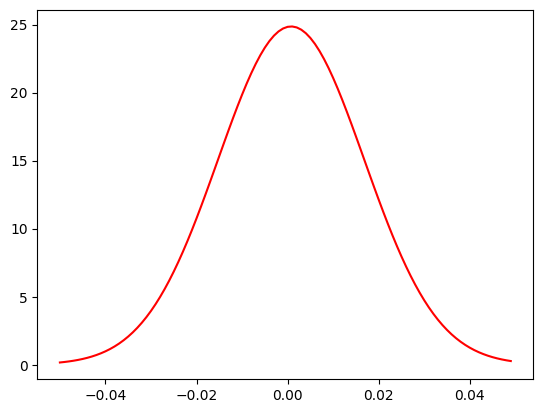

In [31]:
plt.plot(x, normal_dist, color='r')
plt.show()

In [32]:
confidence_level = 0.05

VaR = norm.ppf(confidence_level, portfolio_mean, portfolio_std)
VaR

np.float64(-0.025626161240021775)

In [33]:
num_days = 5

VaR *np.sqrt(num_days)

np.float64(-0.057301838535059)

In [34]:
lower = portfolio_mean - 2* portfolio_std / np.sqrt(count)
higher = portfolio_mean + 2* portfolio_std / np.sqrt(count)

In [35]:
lower

np.float64(-0.0003013309452804424)

In [36]:
higher

np.float64(0.0018419668478519332)